See [github repo](https://github.com/TimotheeMathieu/IllustrationRobustML) for ipynb files 

In this notebook, we illustrate the robust properties of [RobustWeighdedKMeans](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.robust.RobustWeightedKMeans.html#sklearn_extra.robust.RobustWeightedKMeans) and [KMedoids](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html#sklearn_extra.cluster.KMedoids) on a simple toy example. The dataset is constituted of 4 gaussian blobs, three are informative and one is outlier. We want to ignore the outlier blob situated in the upper-right corner of the plots.

We compare our agorithm with [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) from scikit-learn. 

The comparison is in term of retreiving the right clusters but also in terms of computational time: our robust algorithms are not slower than KMeans.

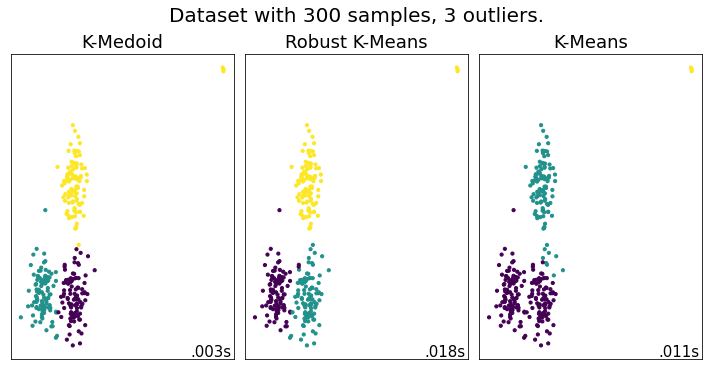

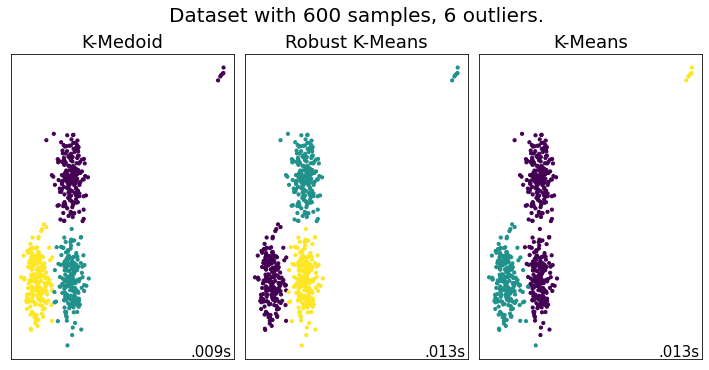

In [9]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

from sklearn_extra.robust import RobustWeightedKMeans
from sklearn_extra.cluster import KMedoids

rng = np.random.RandomState(42)

centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)

kmedoid = KMedoids(n_clusters=n_clusters, random_state=rng)
kmeans = KMeans(n_clusters)

kmeans_rob = RobustWeightedKMeans(
        n_clusters,
        weighting="mom",
        k = 15,
        random_state=rng,
    )

for n_samples in [300, 600]:
    # Construct the dataset
    X, labels_true = make_blobs(
        n_samples=n_samples, centers=centers, cluster_std=0.4, random_state=rng
    )

    # Change the first 1% entries to outliers
    for f in range(int(n_samples / 100)):
        X[f] = [10, 3] + rng.normal(size=2) * 0.1
    # Shuffle the data so that we don't know where the outlier is.
    X = shuffle(X, random_state=rng)
    


    clustering_algorithms = (
        ("K-Medoid", kmedoid),
        ("Robust K-Means", kmeans_rob),
        ("K-Means", kmeans),
    )

    # Create the sub-plots
    plot_num = 1
    fig = plt.figure(figsize=(10,5))
    plt.subplots_adjust(
        left=0.02, right=0.98, bottom=0.001, top=0.85, wspace=0.05, hspace=0.18
    )
    
    # make the plots
    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()

        y_pred = algorithm.labels_.astype(int)

        plt.subplot(1, 3, plot_num)
        plt.title(name, size=18)

        plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.3fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plt.suptitle(
            f"Dataset with {n_samples} samples, {n_samples // 100} outliers.",
            size=20,
        )
        plot_num += 1
